In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import sklearn

plt.style.use('seaborn')

# Datos en las columnas
# ------------------------------
Edad (discreta), Sexo (categorica), Tipo de dolor de pecho (4 posibles dolores, categorica), Presion sanguinea (continua),
Colesterol (mg/dl) (continua), azucar en sangre mayor a 120mg/dl (categorica), resultado electrocardiograma (categorica), frecuencia cardiaca maxima (continua), angina inducida por ejercicio (categorica), st depression ? (continua), slope (categorica), radioscopia (categorica), thal (categorica 3 valores), enfermedad del corazon (categorica - target -> modelo de clasificacion)

In [69]:
# carga csv

heart_csv = pd.read_csv("heart.csv")
heart_csv.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
heart_csv['target'] = heart_csv['target'].astype('category')
heart_csv['sex'] = heart_csv['sex'].astype('category')
heart_csv['cp'] = heart_csv['cp'].astype('category')
heart_csv['fbs'] = heart_csv['fbs'].astype('category')
heart_csv['restecg'] = heart_csv['restecg'].astype('category')
heart_csv['fbs'] = heart_csv['fbs'].astype('category')
heart_csv['exang'] = heart_csv['exang'].astype('category')
heart_csv['slope'] = heart_csv['slope'].astype('category')
heart_csv['ca'] = heart_csv['ca'].astype('category')
heart_csv['thal'] = heart_csv['thal'].astype('category')

heart_csv.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target      category
dtype: object

In [71]:
# voy a mapear el target asi los graficos quedan mas explicitos

heart_csv['target'] = heart_csv['target'].map(lambda x: 'Si' if x == 1 else 'No')
heart_csv.rename(columns = {'target' : 'Enfermedad del corazon'}, inplace=True)

In [72]:
heart_csv.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Enfermedad del corazon
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,Si


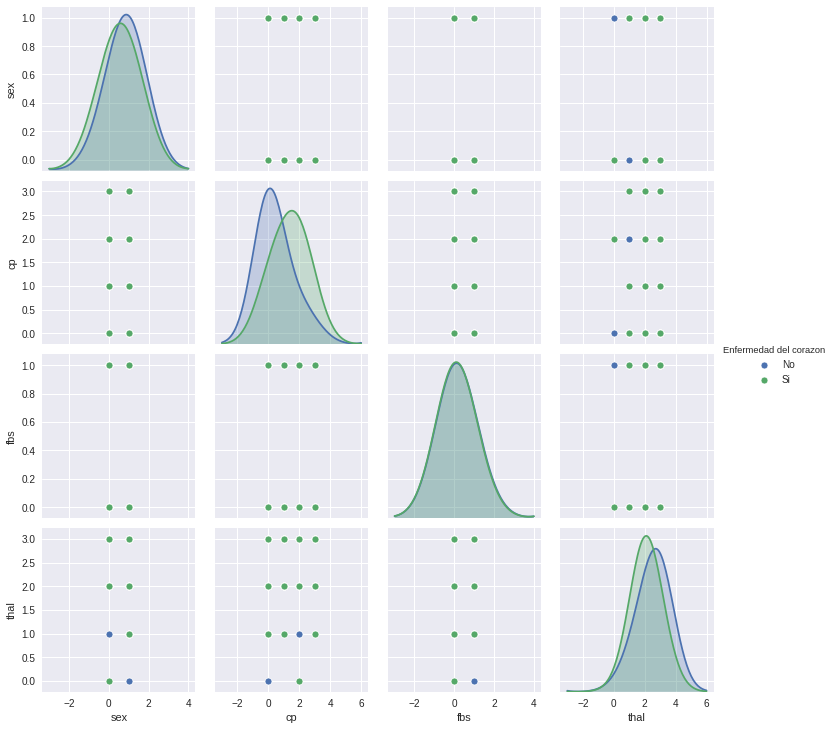

In [79]:
# pairplot de las variables mas llamativas
sns.pairplot(heart_csv, vars=['sex', 'cp', 'fbs', 'thal'], hue='Enfermedad del corazon', diag_kws={'bw': 1})

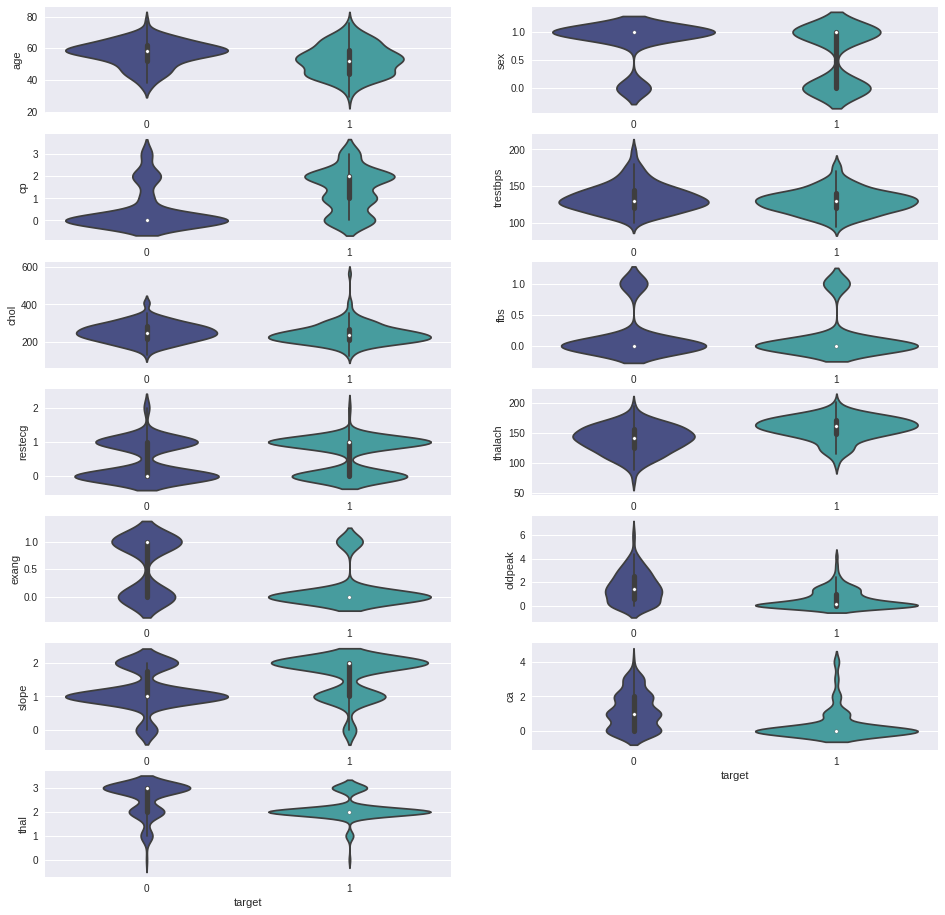

In [289]:
fig, axs = plt.subplots(ncols=2, nrows=7, figsize=(16, 16), sharex='row')
ax = iter(tuple(x for sublist in axs.tolist() for x in sublist))
violins = lambda x: (sns.violinplot(y=heart_csv[x], x=heart_csv['target'], ax = next(ax), palette='mako') if x != "target" else None)
res = map(violins, list(heart_csv.columns))
a = list(res)
fig = plt.gcf()
fig.delaxes(axs[6][1])
plt.savefig("hola2.png")



In [80]:
heart_csv.corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trestbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


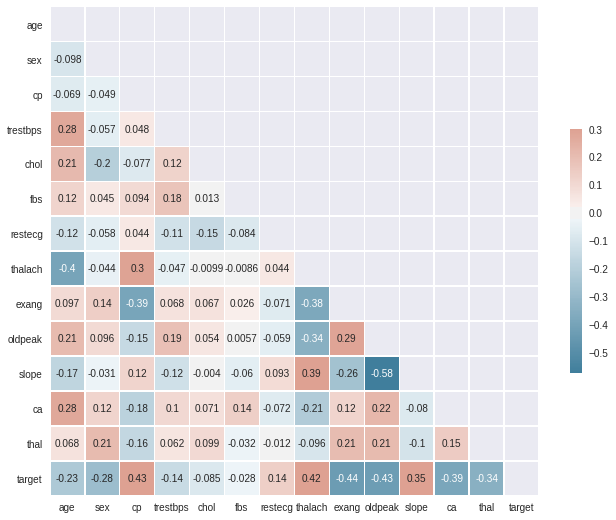

In [294]:
corr_matrix = heart_csv.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)